In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
df = pd.read_csv("database.csv")

In [115]:
df.head()

,train_number,journey_date,booking_date,days_before,day_of_week,start_station,end_station,coach_type,booking_status,confirmed
0,13149,2024-05-21,2024-04-12,39,Tuesday,alipurduar,malda,AC,8PQWL,0
1,13149,2024-01-21,2023-12-16,36,Sunday,naxalbari,alipurduar,AC,CNF,1
2,12343,2024-04-14,2024-03-06,39,Sunday,malda,kishanganj,Sleeper,CNF,1
3,12343,2024-07-12,2024-05-21,52,Friday,sealdah,njp,AC,CNF,1
4,12343,2024-09-27,2024-08-14,44,Friday,malda,njp,Sleeper,CNF,1


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127946 entries, 0 to 127945
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   train_number    127946 non-null  int64 
 1   journey_date    127946 non-null  object
 2   booking_date    127946 non-null  object
 3   days_before     127946 non-null  int64 
 4   day_of_week     127946 non-null  object
 5   start_station   127946 non-null  object
 6   end_station     127946 non-null  object
 7   coach_type      127946 non-null  object
 8   booking_status  127946 non-null  object
 9   confirmed       127946 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 9.8+ MB


In [117]:
df.columns

Index(['train_number', 'journey_date', 'booking_date', 'days_before',
       'day_of_week', 'start_station', 'end_station', 'coach_type',
       'booking_status', 'confirmed'],
      dtype='object')

In [118]:
df.describe()

,train_number,days_before,confirmed
count,127946.000000,127946.000000,127946.000000
mean,12747.108718,36.972590,0.500000
std,403.000050,14.376412,0.500002
min,12343.000000,10.000000,0.000000
25%,12343.000000,25.000000,0.000000
50%,13149.000000,38.000000,0.500000
75%,13149.000000,49.000000,1.000000
max,13149.000000,60.000000,1.000000


In [119]:
print("\n✅ Missing values:")
print(df.isnull().sum())


✅ Missing values:
train_number      0
journey_date      0
booking_date      0
days_before       0
day_of_week       0
start_station     0
end_station       0
coach_type        0
booking_status    0
confirmed         0
dtype: int64


In [120]:
print("\n✅ Duplicates:")
print(df.duplicated().sum())


✅ Duplicates:
29305


In [121]:
print("\n✅ Class Balance (Confirmed vs Not Confirmed):")
print(df['confirmed'].value_counts())


✅ Class Balance (Confirmed vs Not Confirmed):
confirmed
0    63973
1    63973
Name: count, dtype: int64


In [122]:
df[df.duplicated()].head()

,train_number,journey_date,booking_date,days_before,day_of_week,start_station,end_station,coach_type,booking_status,confirmed
622,13149,2024-07-13,2024-05-16,58,Saturday,sealdah,naxalbari,Sleeper,CNF,1
726,13149,2024-06-11,2024-05-06,36,Tuesday,malda,sealdah,Sleeper,CNF,1
836,13149,2024-11-09,2024-09-13,57,Saturday,sealdah,malda,AC,CNF,1
1051,13149,2024-01-13,2023-12-12,32,Saturday,malda,sealdah,AC,CNF,1
1182,13149,2024-11-02,2024-09-07,56,Saturday,sealdah,alipurduar,Sleeper,CNF,1


In [123]:
new_df = df.drop_duplicates()

In [124]:
new_df.duplicated().sum()

0

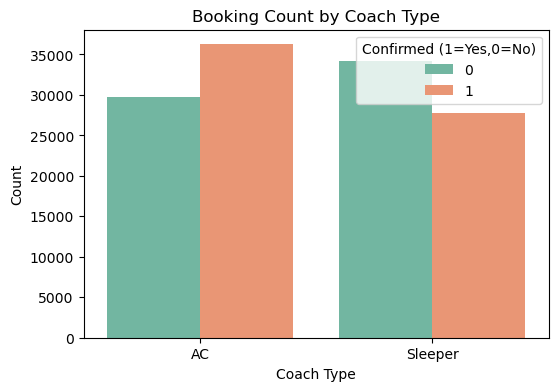

In [125]:
plt.figure(figsize=(6,4))
sns.countplot(x="coach_type", data = df, hue="confirmed", palette="Set2")
plt.title("Booking Count by Coach Type")
plt.xlabel("Coach Type")
plt.ylabel("Count")
plt.legend(title="Confirmed (1=Yes,0=No)")
plt.show()

In [126]:
df_copy = df.copy()

In [127]:
df_copy['journey_date'] = df.copy()['journey_date'] = pd.to_datetime(df.copy()['journey_date'])

In [128]:
df_copy['journey_date']

0        2024-05-21
1        2024-01-21
2        2024-04-14
3        2024-07-12
4        2024-09-27
            ...    
127941   2024-05-26
127942   2024-01-05
127943   2024-10-20
127944   2024-09-10
127945   2024-05-13
Name: journey_date, Length: 127946, dtype: datetime64[ns]

In [129]:
#monthly_conf = df_copy.groupby('month')['confirmed'].sum()

In [130]:
df_copy['month'] = df_copy['journey_date'].dt.to_period('M')

In [131]:
monthly_conf = df_copy.groupby('month')['confirmed'].sum()

In [132]:
monthly_conf.head()

month
2024-01    6181
2024-02    5652
2024-03    6218
2024-04    5917
2024-05    3199
Freq: M, Name: confirmed, dtype: int64

In [133]:
#plt.figure(figsize=(10,6))
#plt.plot(monthly_conf[:,0],monthly_conf[:,1])
#plt.title("Number of Confirmed Bookings per Month")
#plt.xlabel("Month")
#plt.ylabel("Confirmed Bookings")
#plt.xticks(rotation=45)
#plt.show()

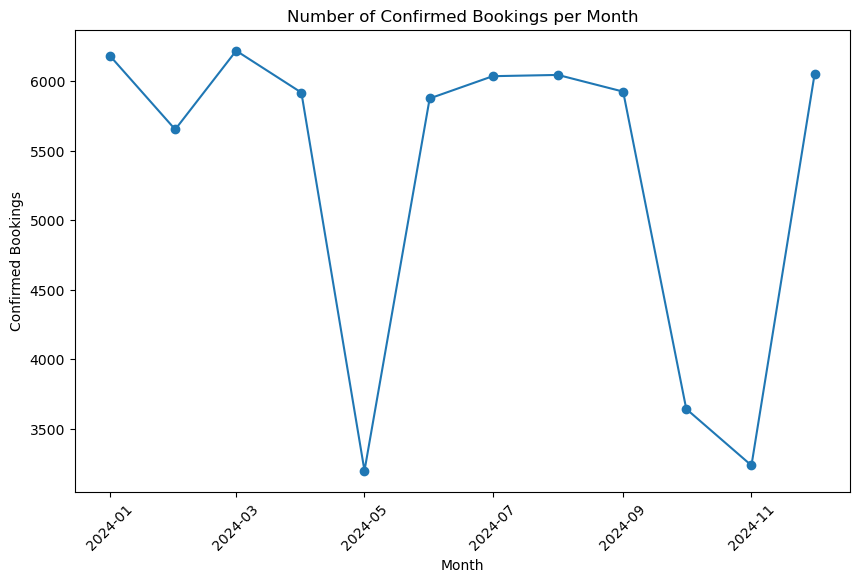

In [134]:
monthly_conf = (
    df_copy.groupby(df_copy['journey_date'].dt.to_period('M'))['confirmed']
    .sum()
    .reset_index()
)

# Convert Period to timestamp (start of month)
monthly_conf['journey_date'] = monthly_conf['journey_date'].dt.to_timestamp()

plt.figure(figsize=(10,6))
plt.plot(monthly_conf['journey_date'], monthly_conf['confirmed'], marker='o')
plt.title("Number of Confirmed Bookings per Month")
plt.xlabel("Month")
plt.ylabel("Confirmed Bookings")
plt.xticks(rotation=45)
plt.show()


In [135]:
df_copy

,train_number,journey_date,booking_date,days_before,day_of_week,start_station,end_station,coach_type,booking_status,confirmed,month
0,13149,2024-05-21,2024-04-12,39,Tuesday,alipurduar,malda,AC,8PQWL,0,2024-05
1,13149,2024-01-21,2023-12-16,36,Sunday,naxalbari,alipurduar,AC,CNF,1,2024-01
2,12343,2024-04-14,2024-03-06,39,Sunday,malda,kishanganj,Sleeper,CNF,1,2024-04
3,12343,2024-07-12,2024-05-21,52,Friday,sealdah,njp,AC,CNF,1,2024-07
4,12343,2024-09-27,2024-08-14,44,Friday,malda,njp,Sleeper,CNF,1,2024-09
...,...,...,...,...,...,...,...,...,...,...,...
127941,12343,2024-05-26,2024-03-30,57,Sunday,sealdah,njp,AC,CNF,1,2024-05
127942,13149,2024-01-05,2023-12-02,34,Friday,sealdah,naxalbari,Sleeper,CNF,1,2024-01
127943,13149,2024-10-20,2024-10-08,12,Sunday,naxalbari,malda,AC,5PQWL,0,2024-10
127944,13149,2024-09-10,2024-08-08,33,Tuesday,sealdah,malda,Sleeper,CNF,1,2024-09


In [136]:
df_copy.head()

,train_number,journey_date,booking_date,days_before,day_of_week,start_station,end_station,coach_type,booking_status,confirmed,month
0,13149,2024-05-21,2024-04-12,39,Tuesday,alipurduar,malda,AC,8PQWL,0,2024-05
1,13149,2024-01-21,2023-12-16,36,Sunday,naxalbari,alipurduar,AC,CNF,1,2024-01
2,12343,2024-04-14,2024-03-06,39,Sunday,malda,kishanganj,Sleeper,CNF,1,2024-04
3,12343,2024-07-12,2024-05-21,52,Friday,sealdah,njp,AC,CNF,1,2024-07
4,12343,2024-09-27,2024-08-14,44,Friday,malda,njp,Sleeper,CNF,1,2024-09


In [137]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False)
df_train_num = df_copy[["train_number"]]
train_number_enc = ohe.fit_transform(df_train_num)

In [138]:
train_number_enc

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [139]:
train_number_ohe = pd.DataFrame(
    train_number_enc,
    columns = ohe.get_feature_names_out()
)

In [140]:
train_number_ohe

,train_number_12343,train_number_13149
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
127941,1.0,0.0
127942,0.0,1.0
127943,0.0,1.0
127944,0.0,1.0


In [141]:
df_encoded = pd.concat([df_copy,train_number_ohe],axis = 1)

In [142]:
df_encoded.head()

,train_number,journey_date,booking_date,days_before,day_of_week,start_station,end_station,coach_type,booking_status,confirmed,month,train_number_12343,train_number_13149
0,13149,2024-05-21,2024-04-12,39,Tuesday,alipurduar,malda,AC,8PQWL,0,2024-05,0.0,1.0
1,13149,2024-01-21,2023-12-16,36,Sunday,naxalbari,alipurduar,AC,CNF,1,2024-01,0.0,1.0
2,12343,2024-04-14,2024-03-06,39,Sunday,malda,kishanganj,Sleeper,CNF,1,2024-04,1.0,0.0
3,12343,2024-07-12,2024-05-21,52,Friday,sealdah,njp,AC,CNF,1,2024-07,1.0,0.0
4,12343,2024-09-27,2024-08-14,44,Friday,malda,njp,Sleeper,CNF,1,2024-09,1.0,0.0


In [143]:
df_coach_type = df_copy[["coach_type"]]
coach_type_enc = ohe.fit_transform(df_coach_type)

In [144]:
coach_type_ohe = pd.DataFrame(
    coach_type_enc,
    columns = ohe.get_feature_names_out()
)

In [145]:
df_encoded = pd.concat([df_encoded,coach_type_ohe],axis = 1)

In [146]:
df_encoded

,train_number,journey_date,booking_date,days_before,day_of_week,start_station,end_station,coach_type,booking_status,confirmed,month,train_number_12343,train_number_13149,coach_type_AC,coach_type_Sleeper
0,13149,2024-05-21,2024-04-12,39,Tuesday,alipurduar,malda,AC,8PQWL,0,2024-05,0.0,1.0,1.0,0.0
1,13149,2024-01-21,2023-12-16,36,Sunday,naxalbari,alipurduar,AC,CNF,1,2024-01,0.0,1.0,1.0,0.0
2,12343,2024-04-14,2024-03-06,39,Sunday,malda,kishanganj,Sleeper,CNF,1,2024-04,1.0,0.0,0.0,1.0
3,12343,2024-07-12,2024-05-21,52,Friday,sealdah,njp,AC,CNF,1,2024-07,1.0,0.0,1.0,0.0
4,12343,2024-09-27,2024-08-14,44,Friday,malda,njp,Sleeper,CNF,1,2024-09,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127941,12343,2024-05-26,2024-03-30,57,Sunday,sealdah,njp,AC,CNF,1,2024-05,1.0,0.0,1.0,0.0
127942,13149,2024-01-05,2023-12-02,34,Friday,sealdah,naxalbari,Sleeper,CNF,1,2024-01,0.0,1.0,0.0,1.0
127943,13149,2024-10-20,2024-10-08,12,Sunday,naxalbari,malda,AC,5PQWL,0,2024-10,0.0,1.0,1.0,0.0
127944,13149,2024-09-10,2024-08-08,33,Tuesday,sealdah,malda,Sleeper,CNF,1,2024-09,0.0,1.0,0.0,1.0


In [147]:
df_start_station = df_copy[["start_station"]]
start_station_enc = ohe.fit_transform(df_start_station)

start_station_ohe = pd.DataFrame(
    start_station_enc,
    columns = ohe.get_feature_names_out()
)

df_encoded = pd.concat([df_encoded,start_station_ohe],axis = 1)
df_encoded

,train_number,journey_date,booking_date,days_before,day_of_week,start_station,end_station,coach_type,booking_status,confirmed,...,train_number_12343,train_number_13149,coach_type_AC,coach_type_Sleeper,start_station_alipurduar,start_station_kishanganj,start_station_malda,start_station_naxalbari,start_station_njp,start_station_sealdah
0,13149,2024-05-21,2024-04-12,39,Tuesday,alipurduar,malda,AC,8PQWL,0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,13149,2024-01-21,2023-12-16,36,Sunday,naxalbari,alipurduar,AC,CNF,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12343,2024-04-14,2024-03-06,39,Sunday,malda,kishanganj,Sleeper,CNF,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,12343,2024-07-12,2024-05-21,52,Friday,sealdah,njp,AC,CNF,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12343,2024-09-27,2024-08-14,44,Friday,malda,njp,Sleeper,CNF,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127941,12343,2024-05-26,2024-03-30,57,Sunday,sealdah,njp,AC,CNF,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127942,13149,2024-01-05,2023-12-02,34,Friday,sealdah,naxalbari,Sleeper,CNF,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
127943,13149,2024-10-20,2024-10-08,12,Sunday,naxalbari,malda,AC,5PQWL,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
127944,13149,2024-09-10,2024-08-08,33,Tuesday,sealdah,malda,Sleeper,CNF,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [148]:
df_encoded

,train_number,journey_date,booking_date,days_before,day_of_week,start_station,end_station,coach_type,booking_status,confirmed,...,train_number_12343,train_number_13149,coach_type_AC,coach_type_Sleeper,start_station_alipurduar,start_station_kishanganj,start_station_malda,start_station_naxalbari,start_station_njp,start_station_sealdah
0,13149,2024-05-21,2024-04-12,39,Tuesday,alipurduar,malda,AC,8PQWL,0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,13149,2024-01-21,2023-12-16,36,Sunday,naxalbari,alipurduar,AC,CNF,1,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12343,2024-04-14,2024-03-06,39,Sunday,malda,kishanganj,Sleeper,CNF,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,12343,2024-07-12,2024-05-21,52,Friday,sealdah,njp,AC,CNF,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,12343,2024-09-27,2024-08-14,44,Friday,malda,njp,Sleeper,CNF,1,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127941,12343,2024-05-26,2024-03-30,57,Sunday,sealdah,njp,AC,CNF,1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127942,13149,2024-01-05,2023-12-02,34,Friday,sealdah,naxalbari,Sleeper,CNF,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
127943,13149,2024-10-20,2024-10-08,12,Sunday,naxalbari,malda,AC,5PQWL,0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
127944,13149,2024-09-10,2024-08-08,33,Tuesday,sealdah,malda,Sleeper,CNF,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [149]:
df_end_station = df_copy[["end_station"]]
end_station_enc = ohe.fit_transform(df_end_station)

end_station_ohe = pd.DataFrame(
    end_station_enc,
    columns = ohe.get_feature_names_out()
)

df_encoded = pd.concat([df_encoded,end_station_ohe],axis = 1)
df_encoded

,train_number,journey_date,booking_date,days_before,day_of_week,start_station,end_station,coach_type,booking_status,confirmed,...,start_station_malda,start_station_naxalbari,start_station_njp,start_station_sealdah,end_station_alipurduar,end_station_kishanganj,end_station_malda,end_station_naxalbari,end_station_njp,end_station_sealdah
0,13149,2024-05-21,2024-04-12,39,Tuesday,alipurduar,malda,AC,8PQWL,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,13149,2024-01-21,2023-12-16,36,Sunday,naxalbari,alipurduar,AC,CNF,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,12343,2024-04-14,2024-03-06,39,Sunday,malda,kishanganj,Sleeper,CNF,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,12343,2024-07-12,2024-05-21,52,Friday,sealdah,njp,AC,CNF,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,12343,2024-09-27,2024-08-14,44,Friday,malda,njp,Sleeper,CNF,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127941,12343,2024-05-26,2024-03-30,57,Sunday,sealdah,njp,AC,CNF,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
127942,13149,2024-01-05,2023-12-02,34,Friday,sealdah,naxalbari,Sleeper,CNF,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
127943,13149,2024-10-20,2024-10-08,12,Sunday,naxalbari,malda,AC,5PQWL,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
127944,13149,2024-09-10,2024-08-08,33,Tuesday,sealdah,malda,Sleeper,CNF,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [150]:
print(df_encoded["start_station_alipurduar"])

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
127941    0.0
127942    0.0
127943    0.0
127944    0.0
127945    0.0
Name: start_station_alipurduar, Length: 127946, dtype: float64


In [151]:
# Define weekend/near-weekend days
weekend_days = ["Friday", "Saturday", "Sunday"]

# Create new binary column
df_encoded["is_weekend"] = df_encoded["day_of_week"].isin(weekend_days).astype(int)
df_encoded2 = df_encoded.copy()
print(df_encoded[["day_of_week", "is_weekend"]].head())


  day_of_week  is_weekend
0     Tuesday           0
1      Sunday           1
2      Sunday           1
3      Friday           1
4      Friday           1


In [152]:
df_encoded = df_encoded.drop(["start_station", "end_station", "day_of_week", "train_number","journey_date",	"booking_date","coach_type"], axis=1)

In [153]:
df_encoded.head()

,days_before,booking_status,confirmed,month,train_number_12343,train_number_13149,coach_type_AC,coach_type_Sleeper,start_station_alipurduar,start_station_kishanganj,...,start_station_naxalbari,start_station_njp,start_station_sealdah,end_station_alipurduar,end_station_kishanganj,end_station_malda,end_station_naxalbari,end_station_njp,end_station_sealdah,is_weekend
0,39,8PQWL,0,2024-05,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,36,CNF,1,2024-01,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
2,39,CNF,1,2024-04,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,52,CNF,1,2024-07,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,44,CNF,1,2024-09,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [154]:
import re

def convert_booking_status(status):
    if status == "CNF":
        return 0
    elif "GNWL" in status:
        num = int(re.findall(r'\d+', status)[0])  # extract number
        return num
    elif "PQWL" in status:
        num = int(re.findall(r'\d+', status)[0])  # extract number
        return num * 100
    else:
        return None   # if some unknown value comes

# Apply transformation
df_encoded["booking_status_converted"] = df_encoded["booking_status"].apply(convert_booking_status)


In [155]:
df_encoded

,days_before,booking_status,confirmed,month,train_number_12343,train_number_13149,coach_type_AC,coach_type_Sleeper,start_station_alipurduar,start_station_kishanganj,...,start_station_njp,start_station_sealdah,end_station_alipurduar,end_station_kishanganj,end_station_malda,end_station_naxalbari,end_station_njp,end_station_sealdah,is_weekend,booking_status_converted
0,39,8PQWL,0,2024-05,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,800
1,36,CNF,1,2024-01,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
2,39,CNF,1,2024-04,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
3,52,CNF,1,2024-07,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
4,44,CNF,1,2024-09,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127941,57,CNF,1,2024-05,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
127942,34,CNF,1,2024-01,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0
127943,12,5PQWL,0,2024-10,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,500
127944,33,CNF,1,2024-09,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0


In [156]:
df_encoded = df_encoded.drop(["booking_status"],axis = 1)

In [157]:
df_encoded.head()

,days_before,confirmed,month,train_number_12343,train_number_13149,coach_type_AC,coach_type_Sleeper,start_station_alipurduar,start_station_kishanganj,start_station_malda,...,start_station_njp,start_station_sealdah,end_station_alipurduar,end_station_kishanganj,end_station_malda,end_station_naxalbari,end_station_njp,end_station_sealdah,is_weekend,booking_status_converted
0,39,0,2024-05,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,800
1,36,1,2024-01,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
2,39,1,2024-04,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
3,52,1,2024-07,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
4,44,1,2024-09,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0


In [158]:
df_encoded["month"] = df_encoded["month"].dt.month


In [159]:
df_encoded.head()

,days_before,confirmed,month,train_number_12343,train_number_13149,coach_type_AC,coach_type_Sleeper,start_station_alipurduar,start_station_kishanganj,start_station_malda,...,start_station_njp,start_station_sealdah,end_station_alipurduar,end_station_kishanganj,end_station_malda,end_station_naxalbari,end_station_njp,end_station_sealdah,is_weekend,booking_status_converted
0,39,0,5,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,800
1,36,1,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
2,39,1,4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
3,52,1,7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
4,44,1,9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0


In [195]:
from sklearn.model_selection import StratifiedShuffleSplit
x = df_encoded.drop(["confirmed"], axis=1).copy()
y = df_encoded["confirmed"].copy()

# Create StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in sss.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [197]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(x_train,y_train)

y_pred = classifier.predict(x_test)



In [199]:
from sklearn.metrics import classification_report

print("Classification_report")
print(classification_report(y_test,y_pred))

Classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6398
           1       1.00      1.00      1.00      6397

    accuracy                           1.00     12795
   macro avg       1.00      1.00      1.00     12795
weighted avg       1.00      1.00      1.00     12795



In [201]:
x.head()

,days_before,month,train_number_12343,train_number_13149,coach_type_AC,coach_type_Sleeper,start_station_alipurduar,start_station_kishanganj,start_station_malda,start_station_naxalbari,start_station_njp,start_station_sealdah,end_station_alipurduar,end_station_kishanganj,end_station_malda,end_station_naxalbari,end_station_njp,end_station_sealdah,is_weekend,booking_status_converted
0,39,5,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,800
1,36,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
2,39,4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0
3,52,7,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0
4,44,9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0


In [205]:
def get_user_input():
    print("Enter journey details to predict ticket confirmation:\n")
    
    # Numeric inputs
    days_before = int(input("Days before journey: "))
    month = int(input("Month (1-12): "))
    
    # Train number
    train_number = int(input("Train number (12343 / 13149): "))
    train_12343 = 1 if train_number == 12343 else 0
    train_13149 = 1 if train_number == 13149 else 0

    # Coach type
    coach = input("Coach type (AC / Sleeper): ").strip().lower()
    coach_ac = 1 if coach == "ac" else 0
    coach_sleeper = 1 if coach == "sleeper" else 0

    # Start station
    start_station = input("Start station (alipurduar/kishanganj/malda/naxalbari/njp/sealdah): ").strip().lower()
    start_onehot = {s: 0 for s in ["alipurduar","kishanganj","malda","naxalbari","njp","sealdah"]}
    if start_station in start_onehot:
        start_onehot[start_station] = 1

    # End station
    end_station = input("End station (alipurduar/kishanganj/malda/naxalbari/njp/sealdah): ").strip().lower()
    end_onehot = {s: 0 for s in ["alipurduar","kishanganj","malda","naxalbari","njp","sealdah"]}
    if end_station in end_onehot:
        end_onehot[end_station] = 1

    # Weekend
    weekend = input("Is weekend? (yes/no): ").strip().lower()
    is_weekend = 1 if weekend == "yes" else 0

    # Booking status
    booking_status = input("Booking status (e.g., CNF, 15GNWL, 5PQWL): ").strip().upper()
    if booking_status == "CNF":
        booking_status_converted = 0
    elif "GNWL" in booking_status:
        num = int(booking_status.replace("GNWL", ""))
        booking_status_converted = num
    elif "PQWL" in booking_status:
        num = int(booking_status.replace("PQWL", ""))
        booking_status_converted = num * 100
    else:
        booking_status_converted = 0

    # Build row with correct order
    row = [
        days_before, month,
        train_12343, train_13149,
        coach_ac, coach_sleeper,
        start_onehot["alipurduar"], start_onehot["kishanganj"], start_onehot["malda"],
        start_onehot["naxalbari"], start_onehot["njp"], start_onehot["sealdah"],
        end_onehot["alipurduar"], end_onehot["kishanganj"], end_onehot["malda"],
        end_onehot["naxalbari"], end_onehot["njp"], end_onehot["sealdah"],
        is_weekend, booking_status_converted
    ]
    
    return pd.DataFrame([row], columns=feature_names)


# ==== Example usage ====
manual_row = get_user_input()
print("\nYour input row:\n", manual_row)

# Prediction
y_pred = classifier.predict(manual_row)[0]
if y_pred == 1:
    print("\n✅ Prediction: Ticket will get CONFIRMED")
else:
    print("\n❌ Prediction: Ticket will NOT be confirmed")

Enter journey details to predict ticket confirmation:



Days before journey:  45
Month (1-12):  1
Train number (12343 / 13149):  12343
Coach type (AC / Sleeper):  sleeper
Start station (alipurduar/kishanganj/malda/naxalbari/njp/sealdah):  sealdah
End station (alipurduar/kishanganj/malda/naxalbari/njp/sealdah):  njp
Is weekend? (yes/no):  no
Booking status (e.g., CNF, 15GNWL, 5PQWL):  1GNWL



Your input row:
    days_before  month  train_number_12343  train_number_13149  coach_type_AC  \
0           45      1                   1                   0              0   

   coach_type_Sleeper  start_station_alipurduar  start_station_kishanganj  \
0                   1                         0                         0   

   start_station_malda  start_station_naxalbari  start_station_njp  \
0                    0                        0                  0   

   start_station_sealdah  end_station_alipurduar  end_station_kishanganj  \
0                      1                       0                       0   

   end_station_malda  end_station_naxalbari  end_station_njp  \
0                  0                      0                1   

   end_station_sealdah  is_weekend  booking_status_converted  
0                    0           0                         1  

❌ Prediction: Ticket will NOT be confirmed
